In [1]:
# the fast.ai library
from fastai import *
from fastai.vision import *

# to inspect the directory
import os
from pathlib import Path

# for data manipulation (in this Kernel mainly used to read .csv files)
import pandas as pd

# for numerical analysis
import numpy as np

# to display imags
from PIL import Image

#import this for more CNN architectures
import torchvision.models

import matplotlib.pyplot as plt


In [5]:
TRAIN = "../ABC/train"
TEST = "../ABC/test"
#TRAIN.exists()
#os.getcwd()

In [6]:
# transforms
tfms = get_transforms(do_flip=False)


data = ImageDataBunch.from_folder(
    path = TRAIN,
    test = TEST,
    valid_pct = 0.2,
    bs = 16,
    size = 28,
    #num_workers = 0,
    ds_tfms = tfms
)


In [12]:
learn = cnn_learner(data, base_arch=models.resnet18, metrics=accuracy, model_dir="/tmp/models", callback_fns=ShowGraph)

epoch,train_loss,valid_loss,accuracy,time
0,1.711855,1.065449,0.388889,01:11
1,1.683346,0.983936,0.611111,01:04
2,1.580312,1.351455,0.277778,01:03


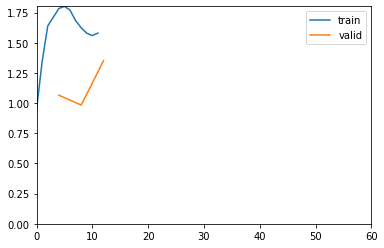

FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "C:\Users\ofir5\Anaconda3\lib\site-packages\torch\utils\data\_utils\worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "C:\Users\ofir5\Anaconda3\lib\site-packages\torch\utils\data\_utils\fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "C:\Users\ofir5\Anaconda3\lib\site-packages\torch\utils\data\_utils\fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "C:\Users\ofir5\Anaconda3\lib\site-packages\fastai\data_block.py", line 651, in __getitem__
    if self.item is None: x,y = self.x[idxs],self.y[idxs]
  File "C:\Users\ofir5\Anaconda3\lib\site-packages\fastai\data_block.py", line 120, in __getitem__
    if isinstance(idxs, Integral): return self.get(idxs)
  File "C:\Users\ofir5\Anaconda3\lib\site-packages\fastai\vision\data.py", line 271, in get
    res = self.open(fn)
  File "C:\Users\ofir5\Anaconda3\lib\site-packages\fastai\vision\data.py", line 267, in open
    return open_image(fn, convert_mode=self.convert_mode, after_open=self.after_open)
  File "C:\Users\ofir5\Anaconda3\lib\site-packages\fastai\vision\image.py", line 398, in open_image
    x = PIL.Image.open(fn).convert(convert_mode)
  File "C:\Users\ofir5\Anaconda3\lib\site-packages\PIL\Image.py", line 2766, in open
    fp = builtins.open(filename, "rb")
FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ofir5\\Desktop\\ABC\\train\\ג\\IMG-10-6.png'


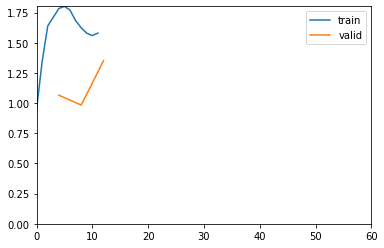

In [13]:
learn.fit_one_cycle(cyc_len=15)

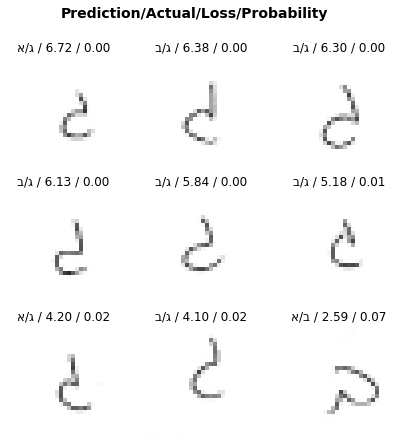

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(7, 7))

In [11]:
print(data)

ImageDataBunch;

Train: LabelList (72 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
א,א,א,א,א
Path: ..\ABC\train;

Valid: LabelList (18 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
ג,ג,א,ב,ב
Path: ..\ABC\train;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: ..\ABC\train
